# Agglomerative Clustering (Complete Linkage) with PCA, 2D/3D Visualization, MAACLI, and Optuna
This notebook focuses solely on Agglomerative Clustering using complete linkage, includes PCA-based 2D and 3D plots, integrates MAACLI insights, and optionally uses Optuna to optimize the number of clusters.

In [1]:
# Core data manipulation and numerical libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Scikit-learn components
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering

# Hyperparameter optimization
import optuna

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

In [2]:
df = pd.read_csv('../data/typhoon_impact_with_extreme_weather.csv')
df.head()

,Typhoon Name,Year,Region,Province,City/Municipality,Families,Person,Brgy,Dead,Injured/Ill,...,PAR_END,Duration_in_PAR_Hours,Max_Sustained_Wind_kph,Typhoon_Type,Max_24hr_Rainfall_mm,Total_Storm_Rainfall_mm,Min_Pressure_hPa,Weather_Station_Mapped,Weather_Records_Found,Weather_Days_Covered
0,BETTY,2023,2,BATANES,BASCO,3608,11120,6,0,0,...,6/1/2023,133.0,195,STY,25.6,39.00,977.1,1,6,6
1,BETTY,2023,2,BATANES,ITBAYAT,968,3028,5,0,0,...,6/1/2023,133.0,195,STY,20.3,32.71,1000.5,1,6,6
2,BETTY,2023,2,BATANES,IVANA,444,1532,4,0,0,...,6/1/2023,133.0,195,STY,25.6,39.00,977.1,1,6,6
3,BETTY,2023,2,BATANES,MAHATAO,575,1792,4,0,0,...,6/1/2023,133.0,195,STY,25.6,39.00,977.1,1,6,6
4,BETTY,2023,2,BATANES,SABTANG,575,1955,6,0,0,...,6/1/2023,133.0,195,STY,25.6,39.00,977.1,1,6,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1776 entries, 0 to 1775
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Typhoon Name             1776 non-null   object 
 1   Year                     1776 non-null   int64  
 2   Region                   1776 non-null   int64  
 3   Province                 1776 non-null   object 
 4   City/Municipality        1776 non-null   object 
 5   Families                 1776 non-null   int64  
 6   Person                   1776 non-null   int64  
 7   Brgy                     1776 non-null   int64  
 8   Dead                     1776 non-null   int64  
 9   Injured/Ill              1776 non-null   int64  
 10  Missing                  1776 non-null   int64  
 11  Totally                  1776 non-null   int64  
 12  Partially                1776 non-null   int64  
 13  Total                    1776 non-null   int64  
 14  Quantity                

In [4]:
df.isnull().sum()

Typhoon Name               0
Year                       0
Region                     0
Province                   0
City/Municipality          0
Families                   0
Person                     0
Brgy                       0
Dead                       0
Injured/Ill                0
Missing                    0
Totally                    0
Partially                  0
Total                      0
Quantity                   0
Cost                       0
Nearest_Station            0
Station_Province           0
Distance_km                0
PAR_START                  0
PAR_END                    0
Duration_in_PAR_Hours      0
Max_Sustained_Wind_kph     0
Typhoon_Type               0
Max_24hr_Rainfall_mm       0
Total_Storm_Rainfall_mm    0
Min_Pressure_hPa           0
Weather_Station_Mapped     0
Weather_Records_Found      0
Weather_Days_Covered       0
dtype: int64

In [5]:
df.columns

Index(['Typhoon Name', 'Year', 'Region', 'Province', 'City/Municipality',
       'Families', 'Person', 'Brgy', 'Dead', 'Injured/Ill', 'Missing',
       'Totally', 'Partially', 'Total', 'Quantity', 'Cost', 'Nearest_Station',
       'Station_Province', 'Distance_km', 'PAR_START', 'PAR_END',
       'Duration_in_PAR_Hours', 'Max_Sustained_Wind_kph', 'Typhoon_Type',
       'Max_24hr_Rainfall_mm', 'Total_Storm_Rainfall_mm', 'Min_Pressure_hPa',
       'Weather_Station_Mapped', 'Weather_Records_Found',
       'Weather_Days_Covered'],
      dtype='object')

In [6]:
df.head()

,Typhoon Name,Year,Region,Province,City/Municipality,Families,Person,Brgy,Dead,Injured/Ill,...,PAR_END,Duration_in_PAR_Hours,Max_Sustained_Wind_kph,Typhoon_Type,Max_24hr_Rainfall_mm,Total_Storm_Rainfall_mm,Min_Pressure_hPa,Weather_Station_Mapped,Weather_Records_Found,Weather_Days_Covered
0,BETTY,2023,2,BATANES,BASCO,3608,11120,6,0,0,...,6/1/2023,133.0,195,STY,25.6,39.00,977.1,1,6,6
1,BETTY,2023,2,BATANES,ITBAYAT,968,3028,5,0,0,...,6/1/2023,133.0,195,STY,20.3,32.71,1000.5,1,6,6
2,BETTY,2023,2,BATANES,IVANA,444,1532,4,0,0,...,6/1/2023,133.0,195,STY,25.6,39.00,977.1,1,6,6
3,BETTY,2023,2,BATANES,MAHATAO,575,1792,4,0,0,...,6/1/2023,133.0,195,STY,25.6,39.00,977.1,1,6,6
4,BETTY,2023,2,BATANES,SABTANG,575,1955,6,0,0,...,6/1/2023,133.0,195,STY,25.6,39.00,977.1,1,6,6


In [7]:
df.drop(columns=['Quantity', 'PAR_START', 'PAR_END', 'Weather_Days_Covered', 'Total', 'Weather_Station_Mapped', 'Station_Province', 'Nearest_Station', 'Year', 'Typhoon Name', 'City/Municipality', 'Province', 'Distance_km'], inplace=True)
df.head()

,Region,Families,Person,Brgy,Dead,Injured/Ill,Missing,Totally,Partially,Cost,Duration_in_PAR_Hours,Max_Sustained_Wind_kph,Typhoon_Type,Max_24hr_Rainfall_mm,Total_Storm_Rainfall_mm,Min_Pressure_hPa,Weather_Records_Found
0,2,3608,11120,6,0,0,0,0,0,2646179.36,133.0,195,STY,25.6,39.00,977.1,6
1,2,968,3028,5,0,0,0,0,0,494592.00,133.0,195,STY,20.3,32.71,1000.5,6
2,2,444,1532,4,0,0,0,0,0,227328.00,133.0,195,STY,25.6,39.00,977.1,6
3,2,575,1792,4,0,0,0,0,0,291082.96,133.0,195,STY,25.6,39.00,977.1,6
4,2,575,1955,6,0,0,0,0,0,296521.75,133.0,195,STY,25.6,39.00,977.1,6


In [8]:
df.columns = df.columns.str.lower()

In [9]:
df.columns

Index(['region', 'families', 'person', 'brgy', 'dead', 'injured/ill',
       'missing', 'totally', 'partially', 'cost', 'duration_in_par_hours',
       'max_sustained_wind_kph', 'typhoon_type', 'max_24hr_rainfall_mm',
       'total_storm_rainfall_mm', 'min_pressure_hpa', 'weather_records_found'],
      dtype='object')

In [10]:
df['typhoon_type'].unique()

array(['STY', 'TY', 'STS', 'TD', 'TS'], dtype=object)

## Data Transformation

In [11]:
# Convert 'region' column to object type
df['region'] = df['region'].astype('object')

# Perform one-hot encoding for 'region' and convert to int (0/1)
region_encoded = pd.get_dummies(df['region'], prefix='region').astype(int)

# Map 'typhoon_type' to the specified labels
typhoon_type_mapping = {'STY': 4, 'TY': 3, 'STS': 2, 'TD': 1, 'TS': 0}
df['typhoon_type'] = df['typhoon_type'].map(typhoon_type_mapping)

# Concatenate the one-hot encoded 'region' columns back to the dataframe
df = pd.concat([df, region_encoded], axis=1)

# Drop the original 'region' column as it's now encoded
df.drop(columns=['region'], inplace=True)

df.head()

,families,person,brgy,dead,injured/ill,missing,totally,partially,cost,duration_in_par_hours,max_sustained_wind_kph,typhoon_type,max_24hr_rainfall_mm,total_storm_rainfall_mm,min_pressure_hpa,weather_records_found,region_2,region_3,region_5,region_8
0,3608,11120,6,0,0,0,0,0,2646179.36,133.0,195,4,25.6,39.00,977.1,6,1,0,0,0
1,968,3028,5,0,0,0,0,0,494592.00,133.0,195,4,20.3,32.71,1000.5,6,1,0,0,0
2,444,1532,4,0,0,0,0,0,227328.00,133.0,195,4,25.6,39.00,977.1,6,1,0,0,0
3,575,1792,4,0,0,0,0,0,291082.96,133.0,195,4,25.6,39.00,977.1,6,1,0,0,0
4,575,1955,6,0,0,0,0,0,296521.75,133.0,195,4,25.6,39.00,977.1,6,1,0,0,0


## PCA Pipeline
Prepare, scale, and run PCA for visualization and downstream clustering.

In [12]:
def prepare_pca_features(input_dataframe: pd.DataFrame, categorical_columns: list = None) -> tuple:
    if categorical_columns is None:
        categorical_columns = input_dataframe.select_dtypes(include=['object']).columns.tolist()
    numerical_column_names = [col for col in input_dataframe.columns if col not in categorical_columns]
    numerical_features_df = input_dataframe[numerical_column_names].copy()
    return numerical_features_df, categorical_columns, numerical_column_names

def scale_numerical_features(numerical_features_df: pd.DataFrame) -> tuple:
    feature_scaler_object = StandardScaler()
    scaled_features_array = feature_scaler_object.fit_transform(numerical_features_df)
    return scaled_features_array, feature_scaler_object

def perform_pca_analysis(scaled_features_array: np.ndarray, n_components: int = None, variance_threshold: float = 0.95) -> tuple:
    if n_components is None:
        preliminary_pca_object = PCA()
        preliminary_pca_object.fit(scaled_features_array)
        cumulative_variance_array = np.cumsum(preliminary_pca_object.explained_variance_ratio_)
        n_components = np.argmax(cumulative_variance_array >= variance_threshold) + 1
    final_pca_object = PCA(n_components=n_components)
    pca_transformed_array = final_pca_object.fit_transform(scaled_features_array)
    explained_variance_ratios = final_pca_object.explained_variance_ratio_
    return pca_transformed_array, final_pca_object, explained_variance_ratios

def create_pca_dataframe(pca_transformed_array: np.ndarray, n_components: int) -> pd.DataFrame:
    pca_column_names = [f'PC{i+1}' for i in range(n_components)]
    return pd.DataFrame(pca_transformed_array, columns=pca_column_names)

def plot_pca_variance_explanation(fitted_pca_object: PCA, figure_title: str = 'PCA Variance Explanation') -> None:
    variance_ratios_array = fitted_pca_object.explained_variance_ratio_
    cumulative_variance_array = np.cumsum(variance_ratios_array)
    n_components_count = len(variance_ratios_array)
    pca_variance_fig, pca_variance_axes = plt.subplots(1, 2, figsize=(14, 5))
    pca_variance_axes[0].bar(range(1, n_components_count + 1), variance_ratios_array, alpha=0.7, color='steelblue')
    pca_variance_axes[0].set_xlabel('Principal Component')
    pca_variance_axes[0].set_ylabel('Explained Variance Ratio')
    pca_variance_axes[0].set_title('Individual Explained Variance')
    pca_variance_axes[0].set_xticks(range(1, n_components_count + 1))
    pca_variance_axes[1].plot(range(1, n_components_count + 1), cumulative_variance_array, 'bo-', linewidth=2, markersize=8)
    pca_variance_axes[1].axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
    pca_variance_axes[1].set_xlabel('Number of Components')
    pca_variance_axes[1].set_ylabel('Cumulative Explained Variance')
    pca_variance_axes[1].set_title('Cumulative Explained Variance')
    pca_variance_axes[1].set_xticks(range(1, n_components_count + 1))
    pca_variance_axes[1].legend()
    pca_variance_axes[1].grid(True, alpha=0.3)
    pca_variance_fig.suptitle(figure_title, fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    plt.close(pca_variance_fig)

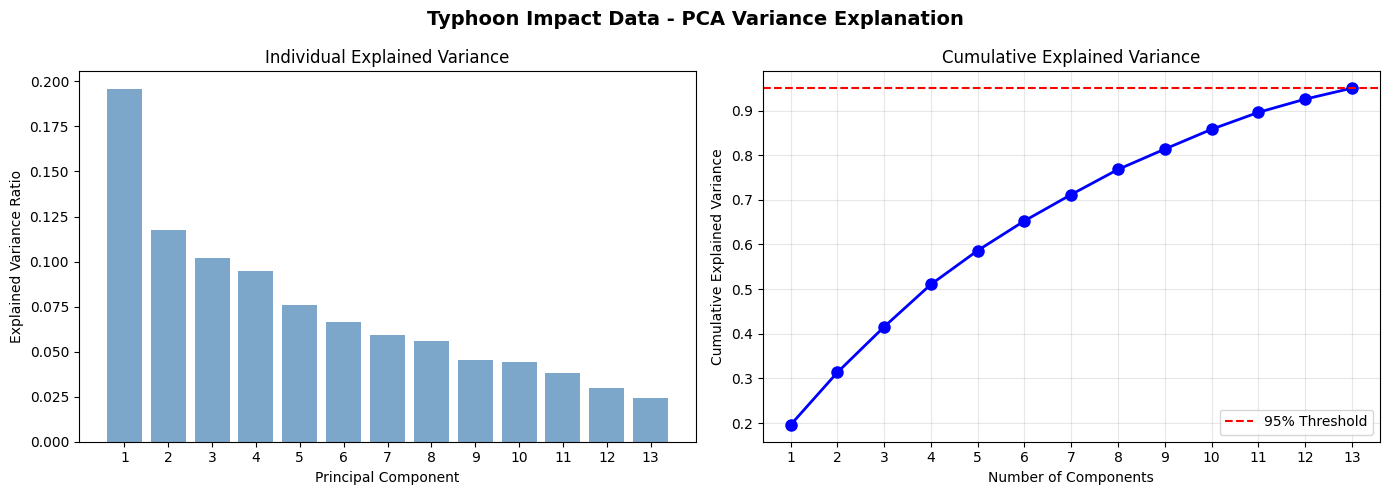

Total variance explained: 95.02%


In [13]:
# Run PCA pipeline on typhoon impact data
typhoon_pca_results = {}
numerical_features_df, categorical_features_df, numerical_column_names = prepare_pca_features(df, None)
scaled_features_array, feature_scaler_object = scale_numerical_features(numerical_features_df)
pca_transformed_array, fitted_pca_object, explained_variance_ratios = perform_pca_analysis(scaled_features_array, None, 0.95)
typhoon_pca_df = create_pca_dataframe(pca_transformed_array, fitted_pca_object.n_components_)
plot_pca_variance_explanation(fitted_pca_object, 'Typhoon Impact Data - PCA Variance Explanation')
print(f'Total variance explained: {np.sum(explained_variance_ratios)*100:.2f}%')

## 2D and 3D PCA Plots

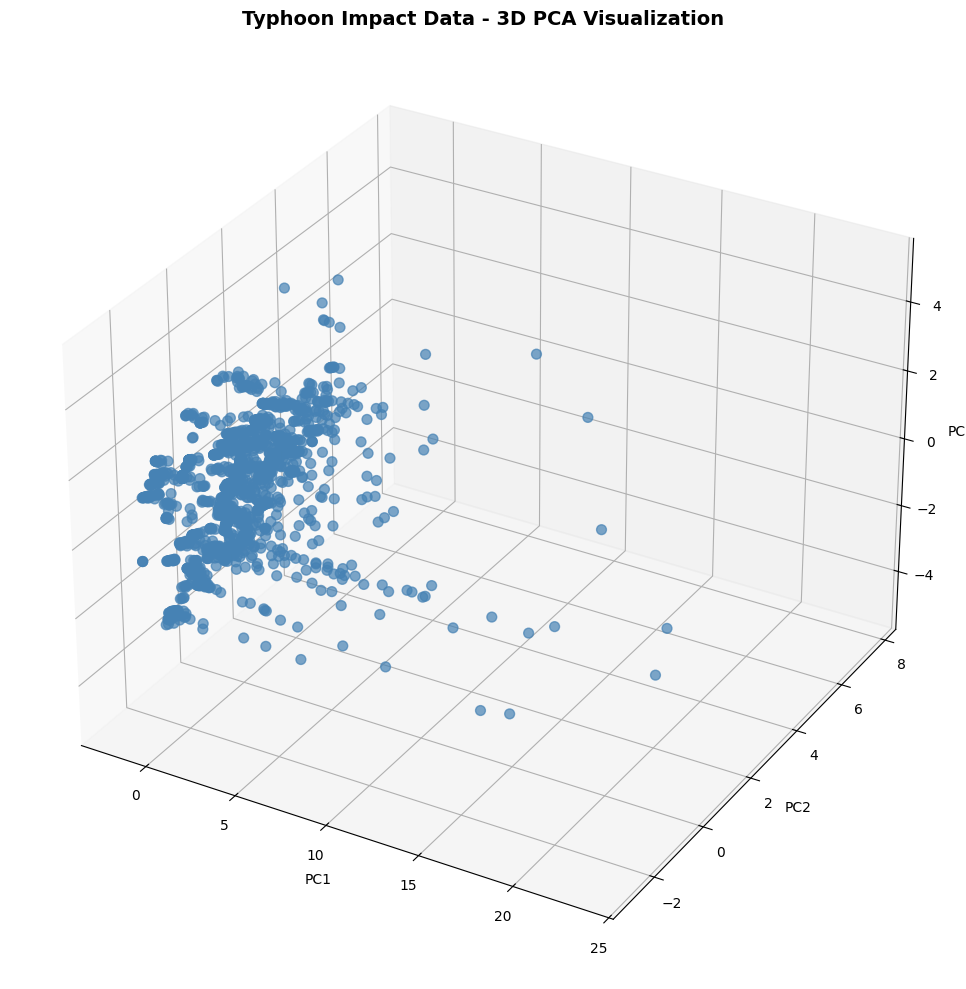

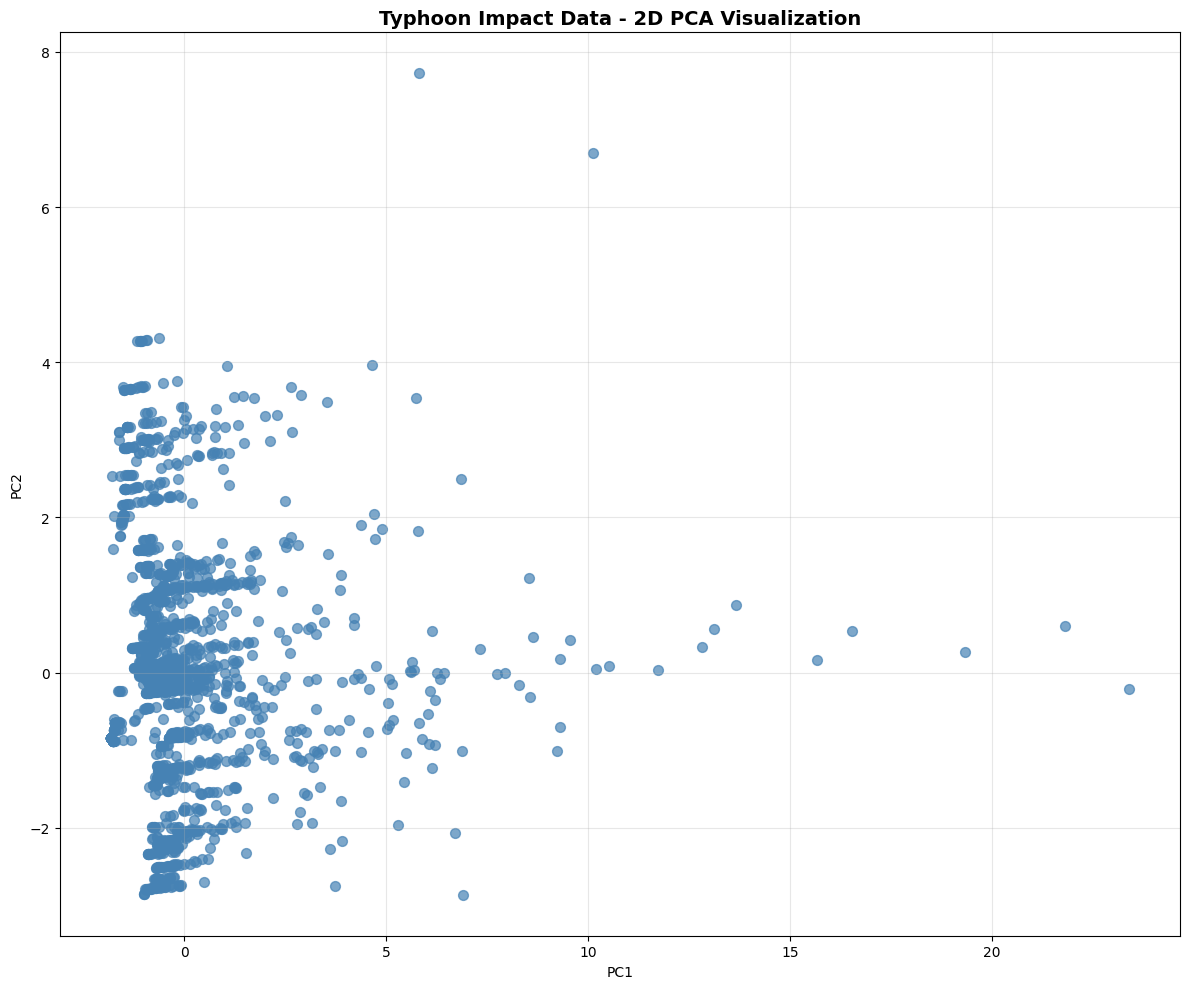

In [14]:
def plot_pca_3d(pca_dataframe: pd.DataFrame, cluster_labels: np.ndarray = None, figure_title: str = 'PCA 3D Visualization') -> None:
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    pc1_values = pca_dataframe['PC1'].values
    pc2_values = pca_dataframe['PC2'].values
    pc3_values = pca_dataframe['PC3'].values if 'PC3' in pca_dataframe.columns else np.zeros_like(pc1_values)
    if cluster_labels is not None:
        scatter_plot = ax.scatter(pc1_values, pc2_values, pc3_values, c=cluster_labels, cmap='viridis', s=50, alpha=0.7)
        fig.colorbar(scatter_plot, ax=ax, label='Cluster')
    else:
        ax.scatter(pc1_values, pc2_values, pc3_values, c='steelblue', s=50, alpha=0.7)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title(figure_title, fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    plt.close(fig)

def plot_pca_2d(pca_dataframe: pd.DataFrame, cluster_labels: np.ndarray = None, figure_title: str = 'PCA 2D Visualization') -> None:
    fig, ax = plt.subplots(figsize=(12, 10))
    pc1_values = pca_dataframe['PC1'].values
    pc2_values = pca_dataframe['PC2'].values
    if cluster_labels is not None:
        scatter_plot_2d = ax.scatter(pc1_values, pc2_values, c=cluster_labels, cmap='viridis', s=50, alpha=0.7)
        fig.colorbar(scatter_plot_2d, ax=ax, label='Cluster')
    else:
        ax.scatter(pc1_values, pc2_values, c='steelblue', s=50, alpha=0.7)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_title(figure_title, fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    plt.close(fig)

# Preview PCA projections without clusters
plot_pca_3d(typhoon_pca_df, figure_title='Typhoon Impact Data - 3D PCA Visualization')
plot_pca_2d(typhoon_pca_df, figure_title='Typhoon Impact Data - 2D PCA Visualization')

## Standard Scaling
Scale the numerical features prior to clustering.

In [15]:
scaler = StandardScaler()
df_clean = df.copy()
df_scaled = scaler.fit_transform(df_clean)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
display(df.head())
display(df_scaled.head())

,families,person,brgy,dead,injured/ill,missing,totally,partially,cost,duration_in_par_hours,max_sustained_wind_kph,typhoon_type,max_24hr_rainfall_mm,total_storm_rainfall_mm,min_pressure_hpa,weather_records_found,region_2,region_3,region_5,region_8
0,3608,11120,6,0,0,0,0,0,2646179.36,133.0,195,4,25.6,39.00,977.1,6,1,0,0,0
1,968,3028,5,0,0,0,0,0,494592.00,133.0,195,4,20.3,32.71,1000.5,6,1,0,0,0
2,444,1532,4,0,0,0,0,0,227328.00,133.0,195,4,25.6,39.00,977.1,6,1,0,0,0
3,575,1792,4,0,0,0,0,0,291082.96,133.0,195,4,25.6,39.00,977.1,6,1,0,0,0
4,575,1955,6,0,0,0,0,0,296521.75,133.0,195,4,25.6,39.00,977.1,6,1,0,0,0


,families,person,brgy,dead,injured/ill,missing,totally,partially,cost,duration_in_par_hours,max_sustained_wind_kph,typhoon_type,max_24hr_rainfall_mm,total_storm_rainfall_mm,min_pressure_hpa,weather_records_found,region_2,region_3,region_5,region_8
0,0.627959,0.432912,-0.245512,-0.04519,-0.121532,-0.050655,-0.140446,-0.198449,1.833588,0.422971,1.093216,1.133352,-1.099347,-1.169851,-1.861117,0.309408,2.161972,-0.557406,-0.776459,-0.51649
1,-0.096344,-0.147600,-0.332928,-0.04519,-0.121532,-0.050655,-0.140446,-0.198449,0.147222,0.422971,1.093216,1.133352,-1.173803,-1.226523,0.466233,0.309408,2.161972,-0.557406,-0.776459,-0.51649
2,-0.240108,-0.254921,-0.420344,-0.04519,-0.121532,-0.050655,-0.140446,-0.198449,-0.062254,0.422971,1.093216,1.133352,-1.099347,-1.169851,-1.861117,0.309408,2.161972,-0.557406,-0.776459,-0.51649
3,-0.204167,-0.236269,-0.420344,-0.04519,-0.121532,-0.050655,-0.140446,-0.198449,-0.012284,0.422971,1.093216,1.133352,-1.099347,-1.169851,-1.861117,0.309408,2.161972,-0.557406,-0.776459,-0.51649
4,-0.204167,-0.224576,-0.245512,-0.04519,-0.121532,-0.050655,-0.140446,-0.198449,-0.008021,0.422971,1.093216,1.133352,-1.099347,-1.169851,-1.861117,0.309408,2.161972,-0.557406,-0.776459,-0.51649


## Optuna Optimization for Agglomerative (Complete)
Optimize the number of clusters by maximizing silhouette score.

In [16]:
def optuna_agglo_complete_objective(trial, data):
    n_clusters = trial.suggest_int('n_clusters', 2, 8)
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')
    labels = model.fit_predict(data)
    # Require at least 2 clusters
    if len(np.unique(labels)) < 2:
        return -1.0
    return silhouette_score(data, labels)

optuna.logging.set_verbosity(optuna.logging.WARNING)
agglo_study = optuna.create_study(direction='maximize', study_name='agglo_complete_optimization')
agglo_study.optimize(lambda t: optuna_agglo_complete_objective(t, df_scaled.values), n_trials=50, show_progress_bar=True)
print(f"Best n_clusters: {agglo_study.best_params['n_clusters']}")
print(f"Best silhouette: {agglo_study.best_value:.4f}")

  0%|          | 0/50 [00:00<?, ?it/s]

Best n_clusters: 3
Best silhouette: 0.8312


## Train Final Agglomerative (Complete) and Evaluate

In [17]:
best_n_clusters = agglo_study.best_params['n_clusters']
agg_model = AgglomerativeClustering(n_clusters=best_n_clusters, linkage='complete')
cluster_labels = agg_model.fit_predict(df_scaled.values)

# Metrics
silhouette = silhouette_score(df_scaled.values, cluster_labels)
calinski = calinski_harabasz_score(df_scaled.values, cluster_labels)
davies = davies_bouldin_score(df_scaled.values, cluster_labels)
print("Agglomerative (complete) Metrics:")
print(f"- n_clusters: {best_n_clusters}")
print(f"- Silhouette: {silhouette:.4f}")
print(f"- Calinski-Harabasz: {calinski:.4f}")
print(f"- Davies-Bouldin: {davies:.4f}")

Agglomerative (complete) Metrics:
- n_clusters: 3
- Silhouette: 0.8312
- Calinski-Harabasz: 89.2754
- Davies-Bouldin: 0.3744


## 2D and 3D Cluster Visualization

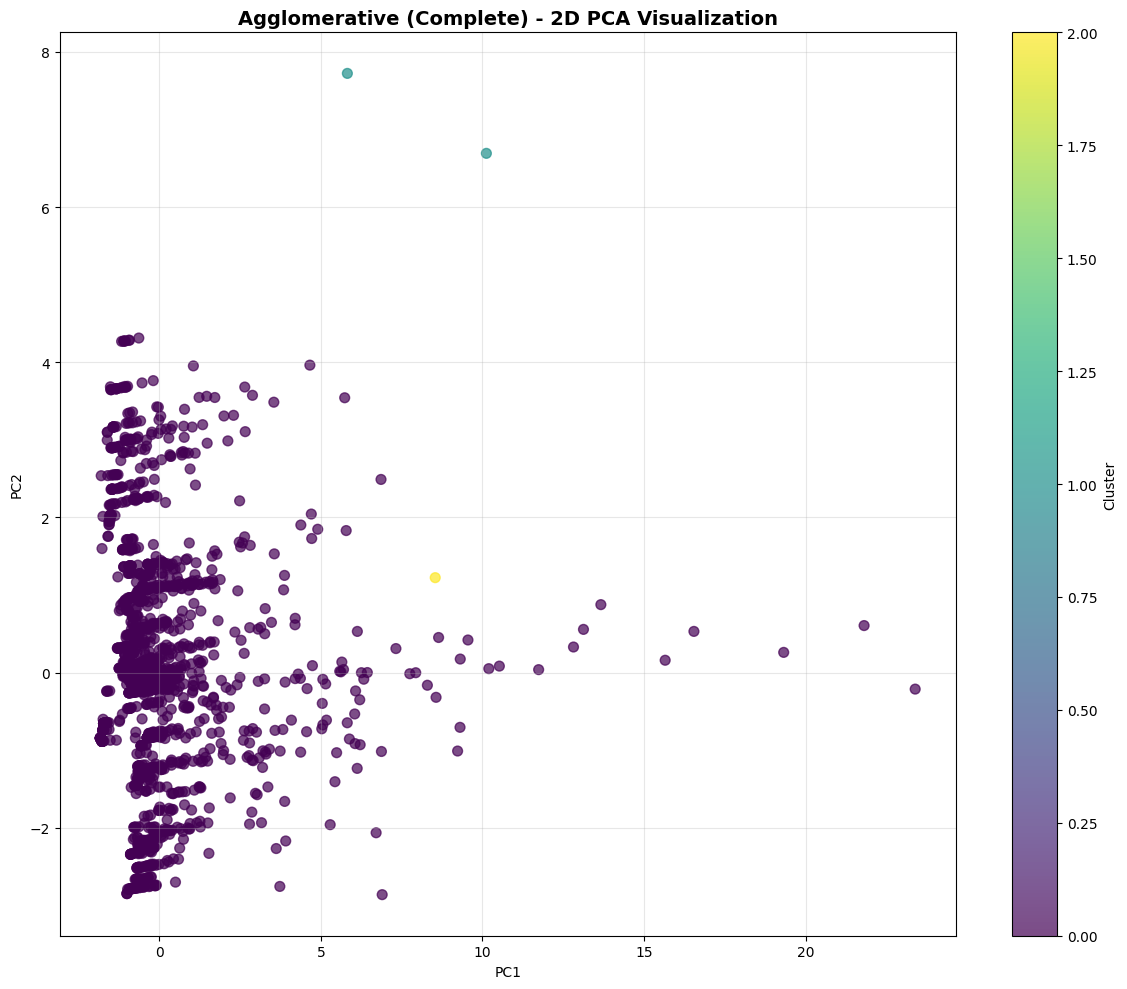

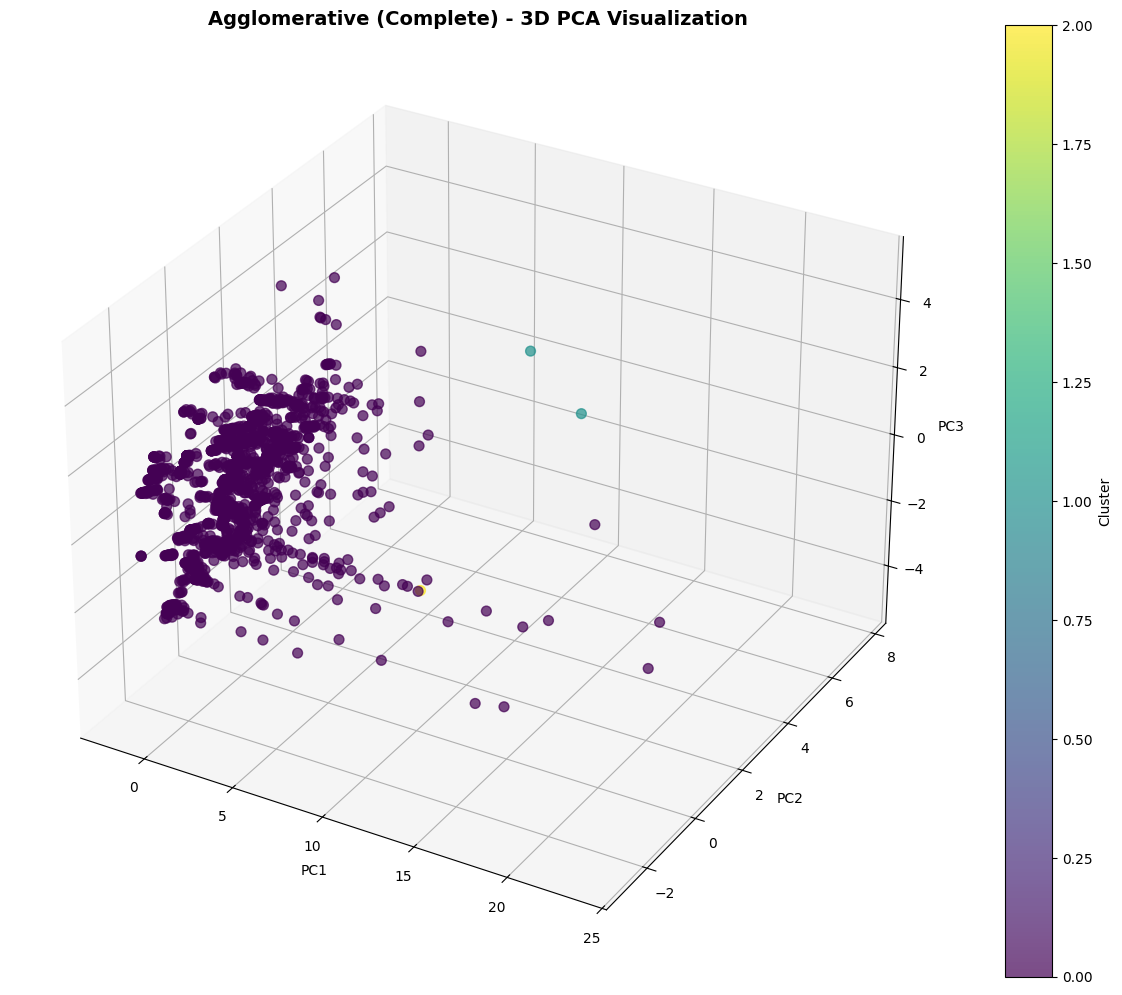

In [18]:
# Add cluster labels to PCA dataframe
typhoon_pca_df['cluster'] = cluster_labels

# 2D plot
plot_pca_2d(typhoon_pca_df, cluster_labels, figure_title='Agglomerative (Complete) - 2D PCA Visualization')
# 3D plot
plot_pca_3d(typhoon_pca_df, cluster_labels, figure_title='Agglomerative (Complete) - 3D PCA Visualization')

## MAACLI Framework
Generate interpretable insights for the agglomerative clusters.

In [19]:
from sklearn.tree import DecisionTreeClassifier, export_text

class MAACLIFramework:
    def __init__(self, original_data: pd.DataFrame, cluster_labels: np.ndarray, feature_columns: list):
        self.original_data = original_data.copy()
        self.cluster_labels = cluster_labels
        self.feature_columns = feature_columns
        self.n_clusters = len(np.unique(cluster_labels))
        self.original_data['cluster'] = cluster_labels
        self.cluster_profiles = None
        self.decision_tree = None
        self.feature_importance = None

    def generate_cluster_profiles(self) -> pd.DataFrame:
        numeric_cols = self.original_data.select_dtypes(include=[np.number]).columns.tolist()
        numeric_cols = [col for col in numeric_cols if col != 'cluster']
        profiles = []
        for cluster_id in range(self.n_clusters):
            cluster_data = self.original_data[self.original_data['cluster'] == cluster_id]
            profile = {'cluster': cluster_id, 'count': len(cluster_data), 'percentage': len(cluster_data) / len(self.original_data) * 100}
            for col in numeric_cols:
                profile[f'{col}_mean'] = cluster_data[col].mean()
                profile[f'{col}_std'] = cluster_data[col].std()
                profile[f'{col}_median'] = cluster_data[col].median()
            profiles.append(profile)
        self.cluster_profiles = pd.DataFrame(profiles)
        return self.cluster_profiles

    def train_surrogate_decision_tree(self, max_depth: int = 4) -> str:
        numeric_cols = self.original_data.select_dtypes(include=[np.number]).columns.tolist()
        numeric_cols = [col for col in numeric_cols if col != 'cluster']
        X = self.original_data[numeric_cols].values
        y = self.cluster_labels
        self.decision_tree = DecisionTreeClassifier(max_depth=max_depth, random_state=42, min_samples_leaf=10)
        self.decision_tree.fit(X, y)
        self.feature_importance = pd.DataFrame({'feature': numeric_cols, 'importance': self.decision_tree.feature_importances_}).sort_values('importance', ascending=False)
        tree_rules = export_text(self.decision_tree, feature_names=numeric_cols)
        return tree_rules

    def get_cluster_descriptions(self) -> dict:
        if self.cluster_profiles is None:
            self.generate_cluster_profiles()
        descriptions = {}
        impact_features = ['families', 'person', 'dead', 'injured/ill', 'missing', 'totally', 'partially', 'cost', 'max_sustained_wind_kph', 'max_24hr_rainfall_mm', 'duration_in_par_hours']
        available_features = [f for f in impact_features if f in self.original_data.columns]
        for cluster_id in range(self.n_clusters):
            cluster_data = self.original_data[self.original_data['cluster'] == cluster_id]
            desc = {'cluster_id': cluster_id, 'sample_count': len(cluster_data), 'percentage': f"{len(cluster_data) / len(self.original_data) * 100:.1f}%", 'characteristics': {}}
            for feature in available_features:
                desc['characteristics'][feature] = {
                    'mean': cluster_data[feature].mean(),
                    'median': cluster_data[feature].median(),
                    'q25': cluster_data[feature].quantile(0.25),
                    'q75': cluster_data[feature].quantile(0.75)
                }
            descriptions[cluster_id] = desc
        return descriptions

    def classify_cluster_severity(self) -> dict:
        severity_scores = {}
        for cluster_id in range(self.n_clusters):
            cluster_data = self.original_data[self.original_data['cluster'] == cluster_id]
            score = 0
            if 'dead' in cluster_data.columns:
                score += cluster_data['dead'].mean() * 10
            if 'missing' in cluster_data.columns:
                score += cluster_data['missing'].mean() * 5
            if 'injured/ill' in cluster_data.columns:
                score += cluster_data['injured/ill'].mean() * 3
            if 'totally' in cluster_data.columns:
                score += cluster_data['totally'].mean() * 2
            if 'partially' in cluster_data.columns:
                score += cluster_data['partially'].mean() * 1
            if 'families' in cluster_data.columns:
                score += cluster_data['families'].mean() * 0.01
            severity_scores[cluster_id] = score
        sorted_clusters = sorted(severity_scores.items(), key=lambda x: x[1], reverse=True)
        classifications = {}
        for rank, (cluster_id, score) in enumerate(sorted_clusters, start=1):
            label = 'High-Impact' if rank == 1 else ('Moderate-Impact' if rank == 2 else 'Low-Impact')
            classifications[cluster_id] = {'label': label, 'severity_score': score, 'rank': rank}
        return classifications

In [20]:
# Load original dataset copy for readable examples
df_original = pd.read_csv('../data/typhoon_impact_with_extreme_weather.csv')
df_original['cluster'] = cluster_labels

feature_columns = df.columns.tolist()
maacli = MAACLIFramework(original_data=df_original.drop(columns=['cluster']), cluster_labels=cluster_labels, feature_columns=feature_columns)
print(f'Number of clusters: {maacli.n_clusters}')
print(f'Total samples: {len(maacli.original_data)}')

Number of clusters: 3
Total samples: 1776


In [21]:
severity_classifications = maacli.classify_cluster_severity()
print('Cluster severity classifications:')
for cid, info in severity_classifications.items():
    print(cid, info)

Cluster severity classifications:
0 {'label': 'High-Impact', 'severity_score': 0, 'rank': 1}
1 {'label': 'Moderate-Impact', 'severity_score': 0, 'rank': 2}
2 {'label': 'Low-Impact', 'severity_score': 0, 'rank': 3}


In [22]:
tree_rules = maacli.train_surrogate_decision_tree(max_depth=4)
numeric_cols = df_original.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [c for c in numeric_cols if c != 'cluster']
X_tree = df_original[numeric_cols].values
tree_accuracy = maacli.decision_tree.score(X_tree, cluster_labels)
print('Decision tree rules:')
print(tree_rules)
print(f'Surrogate accuracy: {tree_accuracy:.4f}')

Decision tree rules:
|--- Quantity <= 7344.50
|   |--- class: 0
|--- Quantity >  7344.50
|   |--- Distance_km <= 34.61
|   |   |--- class: 0
|   |--- Distance_km >  34.61
|   |   |--- class: 0

Surrogate accuracy: 0.9983


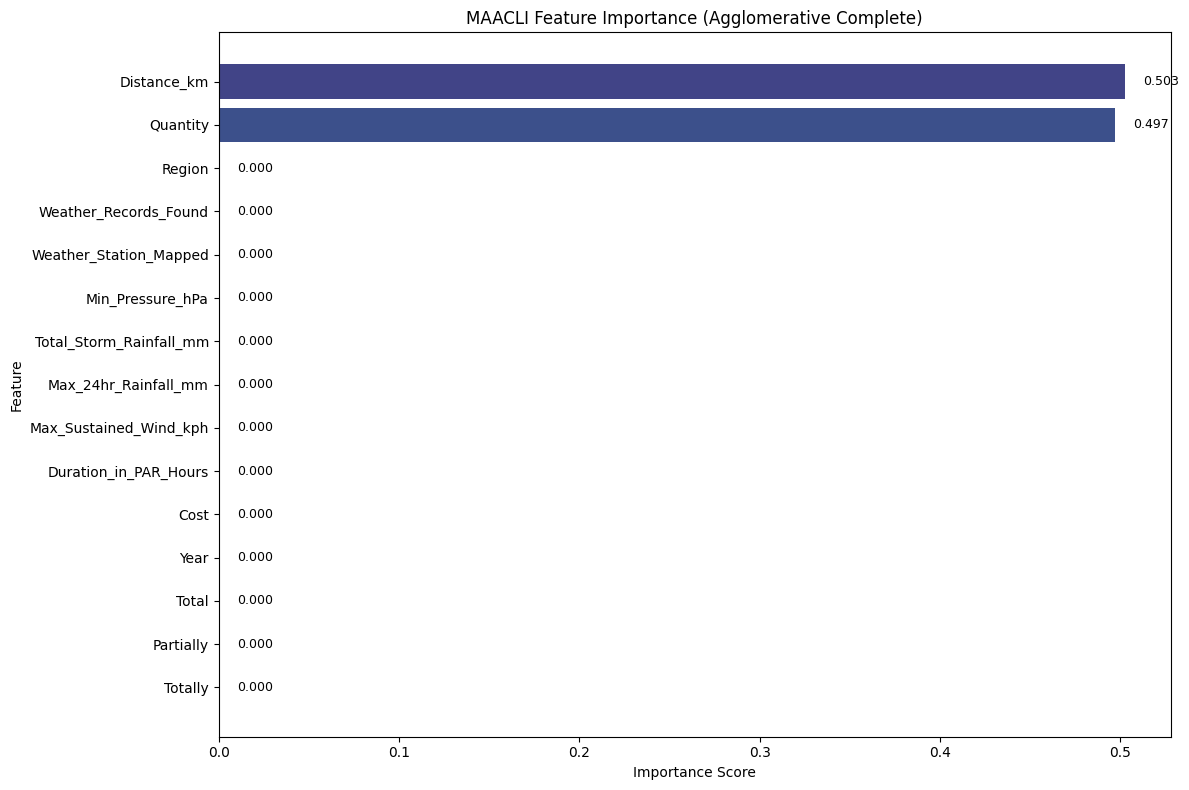

In [23]:
# Feature importance plot
top_features = maacli.feature_importance.head(15)
fig, ax = plt.subplots(figsize=(12, 8))
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(top_features)))
bars = ax.barh(top_features['feature'], top_features['importance'], color=colors)
ax.set_xlabel('Importance Score')
ax.set_ylabel('Feature')
ax.set_title('MAACLI Feature Importance (Agglomerative Complete)')
ax.invert_yaxis()
for bar, importance in zip(bars, top_features['importance']):
    ax.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, f'{importance:.3f}', va='center', fontsize=9)
plt.tight_layout()
plt.show()
plt.close(fig)

In [24]:
# Cluster descriptions
cluster_descriptions = maacli.get_cluster_descriptions()
for cluster_id, desc in cluster_descriptions.items():
    print(f"
Cluster {cluster_id} - {severity_classifications[cluster_id]['label']}")
    print(f"Samples: {desc['sample_count']} ({desc['percentage']})")
    print('Key characteristics:')
    for feature, stats in desc['characteristics'].items():
        print(f"  - {feature}: Q25={stats['q25']:.2f}, Median={stats['median']:.2f}, Q75={stats['q75']:.2f}")

SyntaxError: unterminated string literal (detected at line 4) (984762776.py, line 4)

## Standard Scaling of Sample Data